[[ 1412.75341797   847.72991943]
 [ 1105.09277344   203.83265686]
 [ 1907.52783203   244.63087463]
 [ 1163.27905273   249.61627197]
 [ 1874.88183594   278.86566162]
 [ 1164.23303223   298.26226807]
 [ 1219.99987793   299.10430908]
 [ 1101.67211914   345.61663818]
 [ 1140.90258789   361.4979248 ]
 [ 1902.64990234   451.62329102]
 [ 1508.09436035   458.80886841]
 [ 1542.15661621   458.08181763]
 [ 1609.57531738   462.6307373 ]
 [ 1647.5559082    464.57629395]
 [ 1390.61938477   483.10662842]
 [ 1447.98254395   481.85998535]
 [ 1457.32702637   506.80154419]
 [ 1485.73095703   507.21478271]
 [  525.6315918    535.12841797]
 [ 1896.95117188   540.26025391]
 [ 1456.26464844   557.19348145]
 [ 1485.29223633   560.35986328]
 [ 1452.05603027   580.31591797]
 [ 1385.91394043   578.39416504]
 [ 1540.02978516   590.12304688]
 [ 1603.54711914   588.3248291 ]
 [ 1362.80871582   643.7119751 ]
 [ 1540.73120117   666.41705322]
 [ 1384.98852539   669.48052979]
 [ 1595.42456055   675.55322266]
 [  534.82

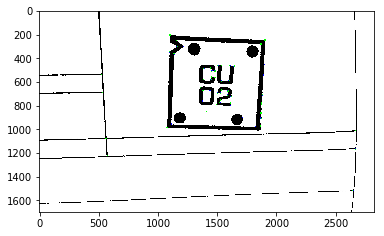

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import argparse

filename = 'th3.jpg'

img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,15,29,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

print(corners)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
size = 5
for i in range(-size, size):
    for j in range(-size, size):
        try:
            img[res[:,1]+i,res[:,0]+j]=[0,0,255]
            img[res[:,3]+i,res[:,2]+j] = [0,255,0]
        except:
            pass

plt.imshow(img)

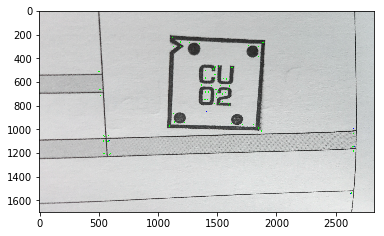

In [20]:
plt.imshow(img)

In [12]:
def order_points(points):
    points = [(x,y) for x,y in points]
    from operator import itemgetter
    p1 = max(points, key=itemgetter(0))
    points.remove(p1)
    p2 = max(points, key=itemgetter(1))
    points.remove(p2)
    p3 = min(points, key=itemgetter(0))
    points.remove(p3)
    p4 = min(points, key=itemgetter(1))
    return p1, p2, p3, p4

def find_rectangle(points):
    def d(p1, p2, p3, p4):
        x0 = p1[0]-p2[0]
        y0 = p1[1]-p2[1]
        x1 = p3[0]-p4[0]
        y1 = p3[1]-p4[1]
        d0 = x0*x0+y0*y0
        d1 = x1*x1+y1*y1
        return abs(d0-d1)/(d0+d1)
    dist = float('inf')
    chosen = None
    from itertools import combinations
    for (p1, p2, p3, p4) in combinations(points, 4):
        p1, p2, p3, p4 = order_points([p1, p2, p3, p4])
        new_dist = d(p1,p2,p3,p4)+d(p1,p3,p2,p4)+d(p1,p4,p2,p3)+d(p1,p2,p2,p3)
        if dist > new_dist:
            dist = new_dist
            chosen = [p1,p2,p3,p4]
    return chosen

In [16]:
p1,p2,p3,p4 = [(int(x),int(y)) for (x,y) in find_rectangle(centroids)]
img_draw = np.copy(img)
cv2.line(img_draw, p1, p2, 255, 5)
cv2.line(img_draw, p2, p3, 255, 5)
cv2.line(img_draw, p3, p4, 255, 5)
cv2.line(img_draw, p4, p1, 255, 5)
plt.show(img_draw)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

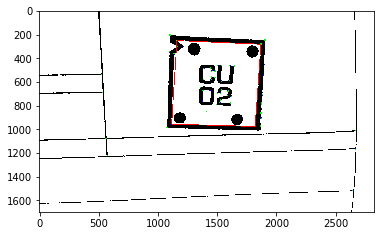

In [20]:
plt.imshow(img_draw)